# Movie Data Analysis Project

Please fill out:
* Student name:Esther Nyawera
* Student pace:Full time
* Scheduled project review date/time: 15th August,2023
* Instructor name: Nikita Njoroge,Samuel Karu, Lucille Kaleha & Diana Mongina
* Blog post URL:


## BUSINESS PROBLEM
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### The Data
In the folder zippedData are movie datasets from:

- Box Office Mojo
- IMDB
- Rotten Tomatoes
- TheMovieDB
- The Numbers 

In this project i will mainly use data from `Box office Mojo` and `IMDB`



The questions we will be trying to answer using `EDA` with `pandas` so as to provide well informed insights are:-

1. The movie bubget when creating a movie and the overall performance of high budget or low bidgety movies when it comes to income generated
2. The different genres of movies and which specific genres perform better.
3. The prefered runtime  of performing movies.
4. The audience engagement in respect to reviews and rating.


![MICROSOFT](microsoft_logo.jpeg)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import seaborn as sns
import numpy as np

In [4]:
#Loading the csv File

bom_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz') 
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


It appears there are several columns with null values. Lets remove all rows with null values. We need data in all the columns except `studio`, so lets get rid of all rows with null columns but ignore `studio`

In [6]:
columns_we_need = ['foreign_gross', 'title', 'domestic_gross', 'year']
bom_df = bom_df.dropna(subset=columns_we_need)
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   object 
 4   year            2009 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.2+ KB


### Lets bring in the IMDB movie data.

Now let's create pandas Dataframes for the two database tables, `movie_basics` and `movie_ratings`

In [7]:
df_movie_basics = pd.read_csv('./data/movie_basics.csv')
df_movies_ratings = pd.read_csv('./data/movie_ratings.csv')

Now lets analyse our two tables starting with the `movie_basics`.

In [8]:
df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
df_movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Looks like the two tables share a movie id. We can join them using that.

In [10]:
imdb_df = df_movie_basics.merge(df_movies_ratings, on='movie_id')
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [11]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


Now we need to remove all rows that have null columns 

In [12]:

imdb_df = imdb_df.dropna()
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


Now that we have removed all rows that have null values in the columns we need, we can join the `bom_df` and `imdb_df`

In [13]:
combined_df = imdb_df.merge(bom_df, left_on=['primary_title', 'start_year'], right_on=['title', 'year'])
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 1254
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1255 non-null   object 
 1   primary_title    1255 non-null   object 
 2   original_title   1255 non-null   object 
 3   start_year       1255 non-null   int64  
 4   runtime_minutes  1255 non-null   float64
 5   genres           1255 non-null   object 
 6   averagerating    1255 non-null   float64
 7   numvotes         1255 non-null   int64  
 8   title            1255 non-null   object 
 9   studio           1255 non-null   object 
 10  domestic_gross   1255 non-null   float64
 11  foreign_gross    1255 non-null   object 
 12  year             1255 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 137.3+ KB


Adding another data set that shows the budget for the movies - `tn.movie_budgets.csv.gz`

In [14]:
budgets_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Further Data Cleaning to remove the duplicate columns and convert the data type of columns with currency from  object to float

In [15]:
#dropping some columns that we do not need
columns_to_drop = ['primary_title', 'original_title']

combined_df = combined_df.drop(columns_to_drop, axis=1)

In [16]:
# create a function that removes the '$' sign  and ','infront of the amounts

def strip_non_numerics(value):
    return value.replace(',', '').replace('$', '')

In [17]:
# convert the column types to float.

def columns_to_float(df, column_names):
    copied_df = df.copy()
    for name in column_names:
        copied_df[name] = copied_df[name].astype('float64')
    return copied_df

In [18]:
# converts the columns into numeric data
def make_columns_numeric(df, column_names):
    copied_df = df.copy()
    for name in column_names:
        copied_df[name] = copied_df[name].apply(strip_non_numerics)
        
    return copied_df

In [19]:
columns_to_strip = ['production_budget', 'worldwide_gross', 'domestic_gross']
budgets_df = make_columns_numeric(budgets_df, columns_to_strip)

columns_to_make_floats = ['production_budget', 'worldwide_gross','domestic_gross']
budgets_df = columns_to_float(budgets_df, columns_to_make_floats)

## 1. The movie bubget when creating a movie and the overall performance of high budget or low budget movies when it comes to income generated

In [20]:
high_budget = budgets_df.sort_values(by= 'production_budget', ascending=False).head(10)
high_budget


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08


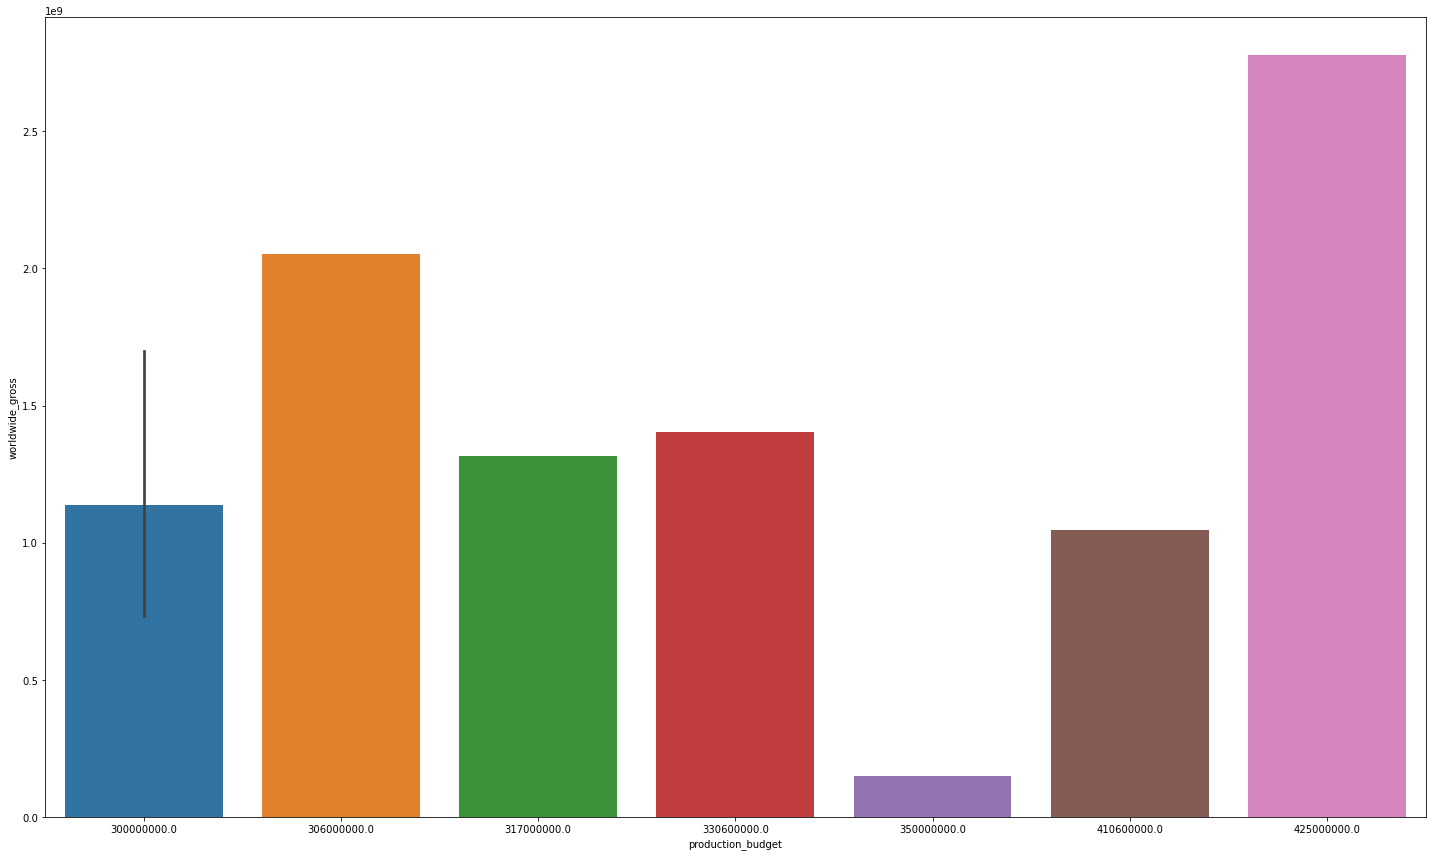

In [21]:
# ploting budget against worldwide gross

fig = plt.subplots(figsize=(20, 12))
X = high_budget['production_budget']
Y = high_budget['worldwide_gross']
budget_bar = sns.barplot(x=X, y=Y)
plt.tight_layout()
plt.show()

### Explanation
The bar  graph above shows the movies with the highest production budget. Movies with highest budget did perform better but also most movies produced were low budget which perfomed relatively better than the movie with the second or third highest production budget.This dat is not enough to make appropriate recommendation.


In [22]:
normalized_budget_df = budgets_df[['production_budget', 'worldwide_gross']]
normalized_budget_df = (normalized_budget_df-normalized_budget_df.mean())/normalized_budget_df.std()

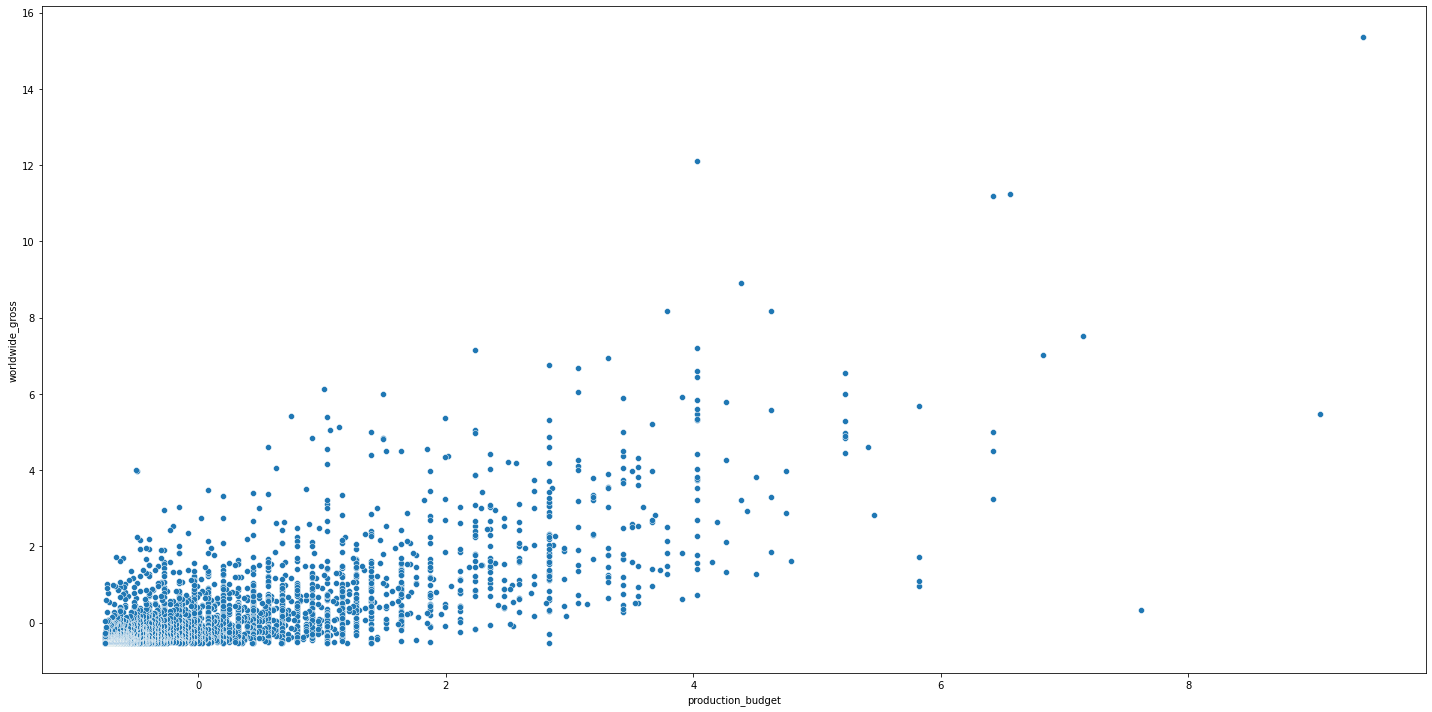

In [23]:
X = normalized_budget_df['production_budget']
Y = normalized_budget_df['worldwide_gross']

fig = plt.subplots(figsize=(20, 10))
scatter = sns.scatterplot(x=X, y=Y)
plt.tight_layout()
plt.show()

### Explanation
The scatter plot above shows a weak posituve correlation.
Even though some high budget movies perfom better and have high world wide gross it is not reflected in all scenarios since there are some outliers of low budgetmovie or medium bugget movies performing with very high worldwide gross.
This infomation shows budget alone cannot provide adequate insight.


## 2. The different genres of movies and which specific genres perform better.

In [24]:
#getting the different genres from the genre column in rows whose movie has multiple genres.
combined_df['genres'] = combined_df['genres'].str.split(',')
exploded_df = combined_df.explode('genres')

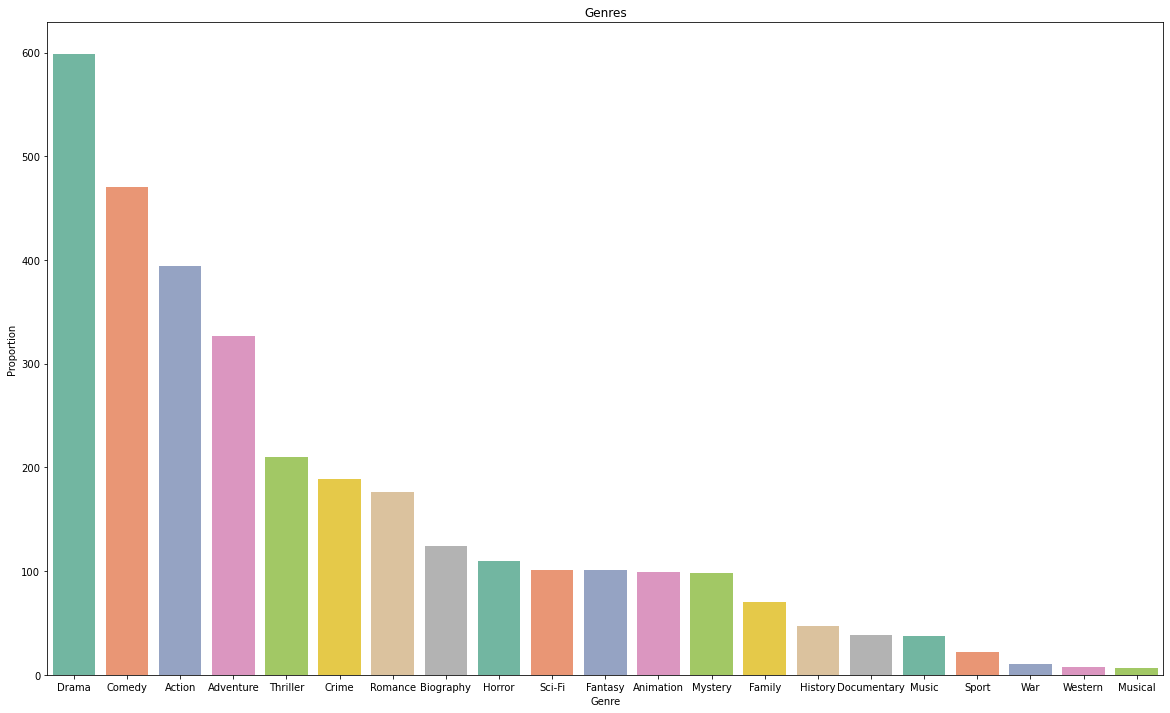

In [25]:
#ploting the result.
Y = exploded_df['genres'].value_counts()
X = Y.index

fig = plt.subplots(figsize=(20, 12))
bar = sns.barplot(x=X, y=Y, palette="Set2")
bar.set(title='Genres', ylabel='Proportion', xlabel='Genre')
plt.show()

### Explanation
The top three performing genres as clearly shown are- `Drama`, `Comedy` and `Action`.

This would preferably be the best genres to invest but in conjuction with other parameters such as great story writing, visual effects, perfomance by actors and many more factors.